# Introdução à Ciência de Dados - UFPB
Professor: Yuri Malheiros

Integrantes:

    ### Douglas Lima 2016003123
    ### Thomas Ribeiro 20180039733


## Python 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Global

Estudo da situação covid no âmbito global

In [32]:
covid19_data = pd.read_csv("datasets/CoronaDataset/covid_19_data.csv")
covid19_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [33]:
paises_top5_confirmados = list(covid19_data.groupby(["Country/Region"]).sum().sort_values(by="Confirmed", ascending=False).head(5).index)

US
Média: 14156.003156361281
Mediana: 0.0
Desvio padrão: 153751.99411840737



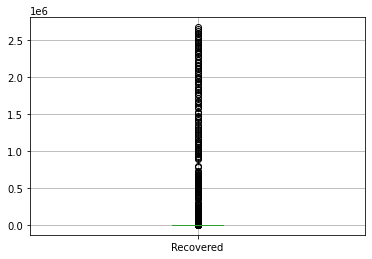

Brazil
Média: 65130.45768468724
Mediana: 37034.0
Desvio padrão: 92078.32052127658



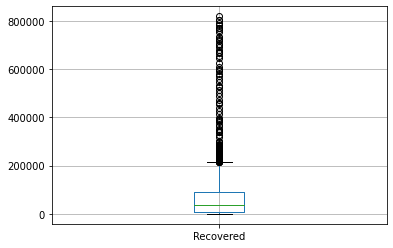

India
Média: 43237.82875686471
Mediana: 5987.0
Desvio padrão: 96002.9934231419



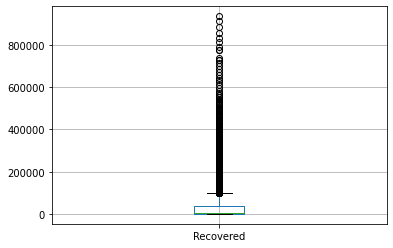

Russia
Média: 7262.347160442743
Mediana: 3679.0
Desvio padrão: 20447.25039230103



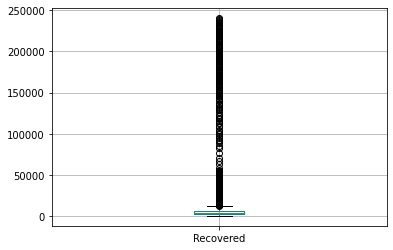

Peru
Média: 11306.669499527856
Mediana: 0.0
Desvio padrão: 63979.01517122482



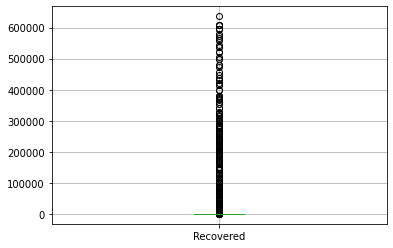

In [34]:

for pais in paises_top5_confirmados:
    print(pais)
    covid19_data_pais = covid19_data.loc[covid19_data['Country/Region'] == pais]
    print("Média:", np.mean(covid19_data_pais["Recovered"]))
    print("Mediana:", np.nanmedian(covid19_data_pais["Recovered"]))
    print("Desvio padrão:", np.std(covid19_data_pais["Recovered"]), end = "\n\n")
    plt.show(covid19_data_pais.boxplot(column=["Recovered"]))

In [35]:
paises_top5_mortos = list(covid19_data.groupby(["Country/Region"]).sum().sort_values(by="Deaths", ascending=False).head(5).index)
paises_top5_mortos

['US', 'Brazil', 'UK', 'Italy', 'Mexico']

## Brasil

Estudo da situação covid no âmbito brasileiro

### Dados que serão utilizados

In [36]:
covid19_data_br = pd.read_csv("datasets/CoronaBrazil/brazil_covid19_cities.csv")
br_population = pd.read_csv("datasets/CoronaBrazil/brazil_population_2019.csv")

dic_sigla_estado = {
"AC" : "Acre", "AL" : "Alagoas", "AP" : "Amapá", "AM" : "Amazonas", "BA" : "Bahia", "CE" : "Ceará", "ES" : "Espírito Santo", "GO" : "Goiás", "MA" : "Maranhão", "MT" : "Mato Grosso", "MS" : "Mato Grosso do Sul", "MG" : "Minas Gerais", "PA" : "Pará", "PB" : "Paraíba", "PR" : "Paraná", "PE" : "Pernambuco", "PI" : "Piauí", "RJ" : "Rio de Janeiro", "RN" : "Rio Grande do Norte", "RS" : "Rio Grande do Sul", "RO" : "Rondônia", "RR" : "Roraima", "SC" : "Santa Catarina", "SP" : "São Paulo", "SE" : "Sergipe", "TO" : "Tocantins", "DF" : "Distrito Federal"
}
dic_estado_sigla = dict([(value, key) for key, value in dic_sigla_estado.items()]) 

### Somando as ocorrências por estado

In [37]:
#Normalização de sigla para nome
def transform_sigla_name(sigla):
    return dic_sigla_estado[sigla]

covid19_data_br["state"] = covid19_data_br["state"].apply(transform_sigla_name)
covid19_data_br

,date,state,name,code,cases,deaths
0,2020-03-27,Acre,Acrelândia,120001.0,0,0
1,2020-03-27,Acre,Assis Brasil,120005.0,0,0
2,2020-03-27,Acre,Brasiléia,120010.0,0,0
3,2020-03-27,Acre,Bujari,120013.0,0,0
4,2020-03-27,Acre,Capixaba,120017.0,0,0
...,...,...,...,...,...,...
1236535,2020-11-03,Tocantins,Tocantinópolis,172120.0,929,21
1236536,2020-11-03,Tocantins,Tupirama,172125.0,97,2
1236537,2020-11-03,Tocantins,Tupiratins,172130.0,18,0
1236538,2020-11-03,Tocantins,Wanderlândia,172208.0,339,5


<AxesSubplot:xlabel='cases', ylabel='state'>

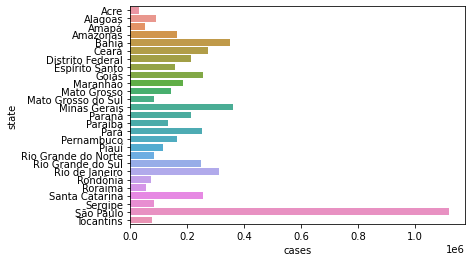

In [38]:

valores_maximos = covid19_data_br.groupby(["state","name"]).max()
casos_estados = valores_maximos.groupby(["state"])["cases"].sum().reset_index()
sns.barplot(data=casos_estados,x="cases",y="state")


In [39]:
populacao_estado = br_population.groupby(["state"])["population"].sum().reset_index()
populacao_estado.index = populacao_estado["state"]
populacao_estado = populacao_estado.drop(["state"], axis=1)


casos_estados.index = casos_estados["state"]
casos_estados = casos_estados.drop(["state"], axis=1)
casos_estados["population"]=populacao_estado["population"]
casos_estados.reset_index()


,state,cases,population
0,Acre,30964,814380
1,Alagoas,91032,2897092
2,Amapá,52832,845731
3,Amazonas,162560,4056806
4,Bahia,349781,10755879
5,Ceará,271507,9040536
6,Distrito Federal,214202,3015268
7,Espírito Santo,156317,3841551
8,Goiás,257048,5621030
9,Maranhão,186219,6373338


<AxesSubplot:xlabel='cases', ylabel='population'>

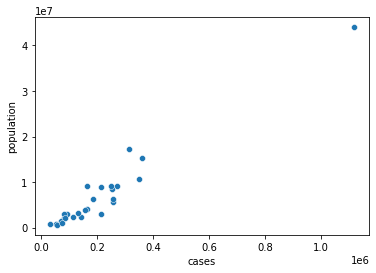

In [40]:
sns.scatterplot(data=casos_estados, x="cases",y="population")


<AxesSubplot:>

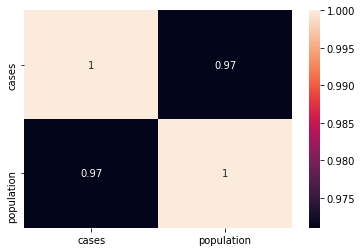

In [44]:
sns.heatmap(casos_estados.corr(), annot=True)

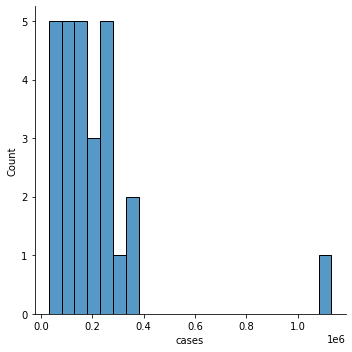

In [41]:

sns.displot(casos_estados, x="cases",binwidth=50000 )